## ML Regression Model

This notebook, prepared for NPU course Data Driven Materials Design Fall 2021, providing an example for building different ML regression models.

Dataset Charateristics:

- A hidden function with random noises: 

    y = f(X1, X2, X3, X4, X5)
    
    
- Noise levels for Dataset C is around 5%. 


- The dataset we have containts a 1000 pairs of known X, y balues


- Evaluation metric -  mean absolute percentage error 

    error = 1/N* sum(abs(y_true - y_pred)/abs(y_true))*100%
    

- The objectives are:
    MAPE <=15% and the total error will be used to rank individuals among all the participants.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape



### Dataset for Model Training 

In [2]:
df_dataC= pd.read_excel('Dataset C.xlsx',sheet_name='训练集C')

In [3]:
df_dataC = df_dataC.iloc[1:]
df_dataC = df_dataC.iloc[:,1:]
df_dataC.columns = ['X1','X2','X3','X4','X5','y']

In [4]:
df_dataC

,X1,X2,X3,X4,X5,y
1,91,77,34,98,5,629.556083
2,3,84,96,29,55,79.199849
3,78,86,99,61,72,302.243343
4,63,68,57,63,50,214.530076
5,38,13,79,20,43,22.951928
...,...,...,...,...,...,...
996,18,64,96,44,49,106.153129
997,66,80,77,26,49,69.285205
998,20,37,11,79,67,160.740796
999,40,97,97,66,8,470.49376


### Data Preprocessing (e.g., Normalization, Distribution Change)

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

std_scalerXc = StandardScaler()
std_scaleryc = StandardScaler()
std_scalerX = [std_scalerXc]
std_scalery = [std_scaleryc]

Xc = np.array(df_dataC.iloc[:,0:-1].values)
yc = np.array(df_dataC.iloc[:,-1].values)
yc = np.log(yc.astype('float'))   
Xc_norm =  std_scalerXc.fit_transform(Xc)
yc_norm =  std_scaleryc.fit_transform(yc.reshape(-1,1))
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc_norm, yc_norm, test_size = 0.2, random_state=1)


### Visualize X Distribution in Training Dataset

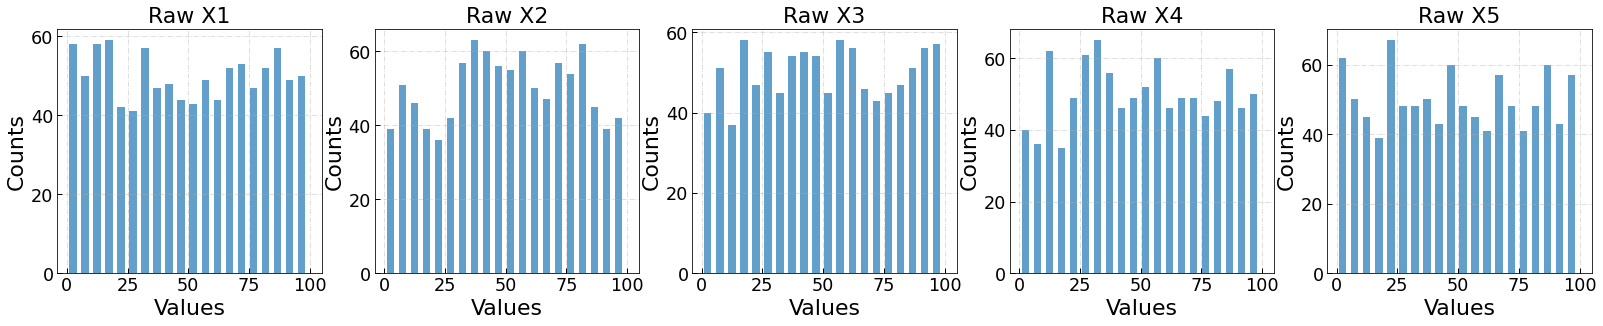

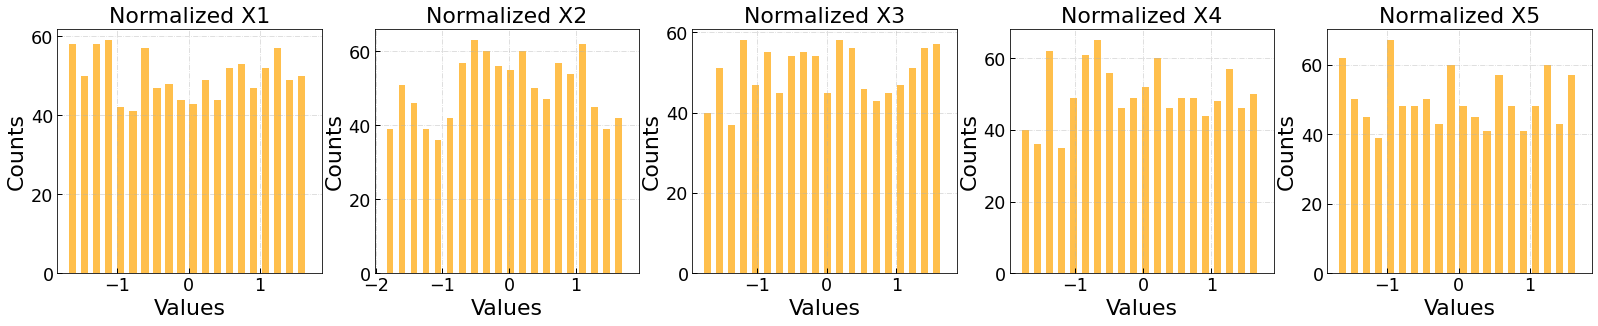

In [6]:
fig, axes = plt.subplots(1, 5, figsize=(5.5*5, 4.5))
fs = 22

for i in np.arange(5):
    axes[i].hist(np.array(df_dataC.iloc[:,i].values), bins =20, width = 3, alpha = 0.7)
    axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
    axes[i].grid(True, linestyle='-.')
    axes[i].set_xlabel('Values', fontsize = fs)
    axes[i].set_ylabel('Counts', fontsize = fs)
    axes[i].set_title('Raw X'+str(i+1), fontsize = fs)
plt.show()

fig, axes = plt.subplots(1, 5, figsize=(5.5*5, 4.5))
fs = 22

for i in np.arange(5):
    axes[i].hist(Xc_norm[:,i], bins =20, width = 0.1, alpha = 0.7, color = 'orange')
    axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
    axes[i].grid(True, linestyle='-.')
    axes[i].set_xlabel('Values', fontsize = fs)
    axes[i].set_ylabel('Counts', fontsize = fs)
    axes[i].set_title('Normalized X'+str(i+1), fontsize = fs)
plt.show()

### Visualize Y Distribution in Training Dataset

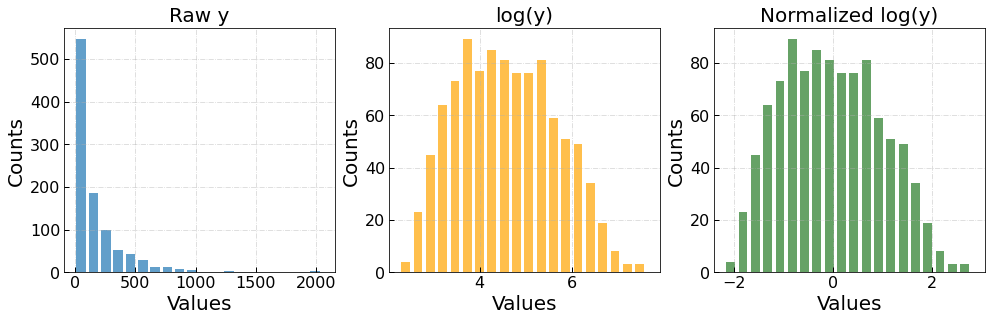

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(5.5*3, 4.5))
fs = 20

i = 0
axes[i].hist(np.array(df_dataC.iloc[:,-1].values), bins =20, width = 80, alpha = 0.7)
axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
axes[i].grid(True, linestyle='-.')
axes[i].set_title('Raw y', fontsize = fs)
axes[i].set_xlabel('Values', fontsize = fs)
axes[i].set_ylabel('Counts', fontsize = fs)


i = 1
axes[i].hist(yc, bins =20, width = 0.19, alpha = 0.7, color = 'orange')
axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
axes[i].grid(True, linestyle='-.')
axes[i].set_xlabel('Values', fontsize = fs)
axes[i].set_ylabel('Counts', fontsize = fs)
axes[i].set_title('log(y)', fontsize = fs)


i = 2
axes[i].hist(yc_norm, bins =20, width = 0.18, alpha = 0.6, color = 'darkgreen')
axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
axes[i].grid(True, linestyle='-.')
axes[i].set_xlabel('Values', fontsize = fs)
axes[i].set_ylabel('Counts', fontsize = fs)
axes[i].set_title('Normalized log(y)', fontsize = fs)

plt.show()


### Define the "ground truth vs prediction" plot

In [8]:
def y_inverse_transform(y_list, std_scalery):
    y_orignal = np.exp(std_scalery.inverse_transform(y_list.reshape(-1,1)))
    return y_orignal 


def plt_true_vs_pred (y_true_list, y_pred_list, title_str_list, color_list):
    fig, axes = plt.subplots(1, 2, figsize=(5.5*2, 4.5))
    fs = 18
    for i in np.arange(len(axes)):
        ## inverse transform 
        y_true = y_inverse_transform(y_true_list[i], std_scalery[0])
        y_pred = y_inverse_transform(y_pred_list[i], std_scalery[0])
        

        lims1 = (0*0.9, 5000*1.1)
        axes[i].scatter(y_true, y_pred, alpha = 0.3, c = color_list[i])
        axes[i].plot(lims1, lims1, 'k--', alpha=0.75, zorder=0)
        rmse_value = np.sqrt(mse(y_true, y_pred))
        mae_value = mae(y_true, y_pred)
        mape_value = mape(y_true, y_pred)

        title = title_str_list[i] + " (MAPE=%.2f" % mape_value+')'
        axes[i].set_xlabel('Ground Truth', fontsize = fs)
        axes[i].set_ylabel('Prediction', fontsize = fs)
        axes[i].set_title(title, fontsize = fs)
        axes[i].set_xlim(5,3000)
        axes[i].set_ylim(5,3000)
        axes[i].set_yscale('log')
        axes[i].set_xscale('log')

        axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
        axes[i].grid(True, linestyle='-.')

        
    plt.subplots_adjust(wspace = 0.4)
    plt.show()



### Evaluating Different Regression Models

#### Linear Regression 

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(Xc_train, yc_train)
yc_pred_train =  lin_reg.predict(Xc_train)
yc_pred_test = lin_reg.predict(Xc_test)

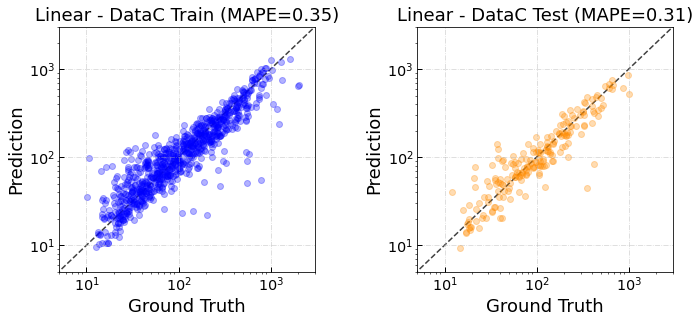

In [10]:
plt_true_vs_pred([yc_train, yc_test], 
                 [yc_pred_train, yc_pred_test], 
                 ['Linear - DataC Train','Linear - DataC Test'],
                 ['blue', 'darkorange'])


#### Polynormial Regression

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_feat_C = PolynomialFeatures(degree=4)
Xc_poly_train = poly_feat_C.fit_transform(Xc_train)
poly_reg_C = LinearRegression()
poly_reg_C.fit(Xc_poly_train, yc_train)
yc_pred_train = poly_reg_C.predict(Xc_poly_train)
yc_pred_test = poly_reg_C.predict(poly_feat_C.fit_transform(Xc_test))

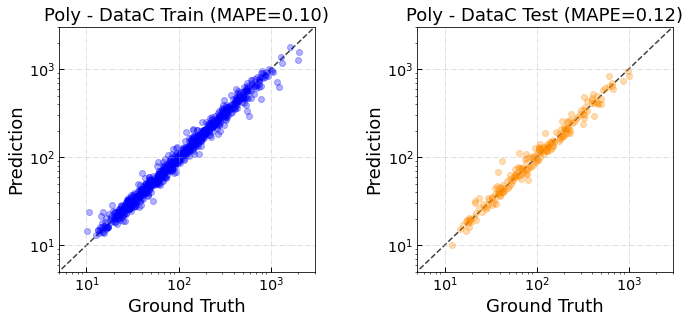

In [12]:
plt_true_vs_pred([yc_train, yc_test], 
                 [yc_pred_train, yc_pred_test], 
                 ['Poly - DataC Train','Poly - DataC Test'],
                 ['blue', 'darkorange'])


#### Random Forest Regression

In [13]:
from sklearn.ensemble import RandomForestRegressor

rf_regr_C = RandomForestRegressor(n_estimators=200, max_depth = 10, min_samples_split = 3)#,criterion = 'mae')
rf_regr_C.fit(Xc_train,yc_train.ravel())
yc_pred_train = rf_regr_C.predict(Xc_train)
yc_pred_test = rf_regr_C.predict(Xc_test)

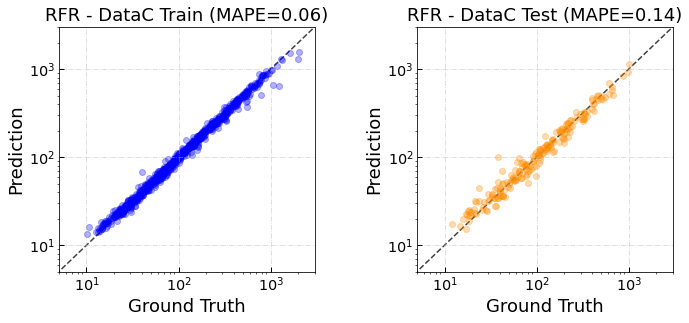

In [14]:
plt_true_vs_pred([yc_train, yc_test], 
                 [yc_pred_train, yc_pred_test], 
                 ['RFR - DataC Train','RFR - DataC Test'],
                 ['blue', 'darkorange'])

#### Gradient Boosting Regression with Decision Tress

In [15]:
from sklearn.ensemble import GradientBoostingRegressor

gb_regr_C = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, max_depth = 5, min_samples_split = 5)
gb_regr_C.fit(Xc_train,yc_train.ravel())
yc_pred_train = gb_regr_C.predict(Xc_train)
yc_pred_test = gb_regr_C.predict(Xc_test)


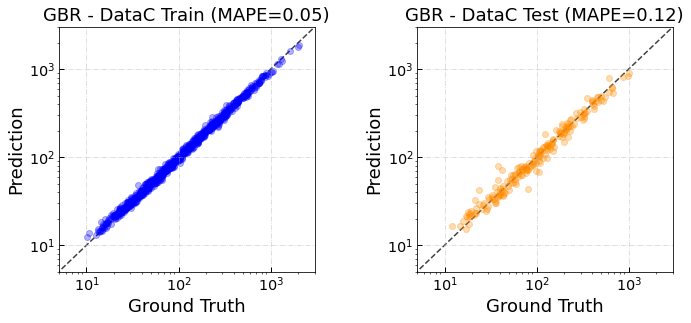

In [16]:
plt_true_vs_pred([yc_train, yc_test], 
                 [yc_pred_train, yc_pred_test], 
                 ['GBR - DataC Train','GBR - DataC Test'],
                 ['blue', 'darkorange'])

#### Neural Network Regression

In [17]:
from sklearn.neural_network import MLPRegressor

NN_regr_C = MLPRegressor(hidden_layer_sizes = [128, 256, 128],activation = 'relu',
                         alpha = 0.05, max_iter = 2000, solver='adam',verbose=False,
                         tol= 1e-10)
NN_regr_C.fit(Xc_train,yc_train.ravel())
yc_pred_train = NN_regr_C.predict(Xc_train)
yc_pred_test = NN_regr_C.predict(Xc_test)

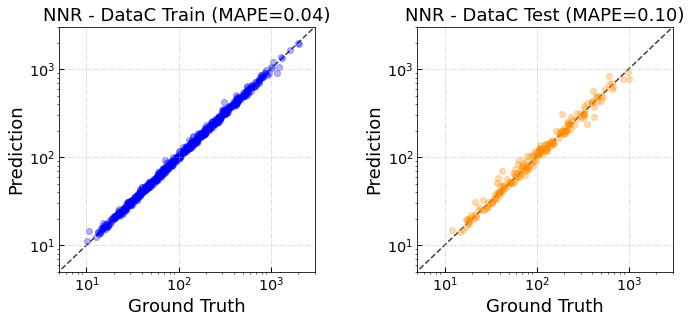

In [18]:
plt_true_vs_pred([yc_train, yc_test], 
                 [yc_pred_train, yc_pred_test], 
                 ['NNR - DataC Train','NNR - DataC Test'],
                 ['blue', 'darkorange'])

#### Gaussian Process Regression - `sklearn`

In [19]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

kernel = RBF(length_scale=0.5) +  WhiteKernel(noise_level=(0.05)**2) 
gp_regr_C = GaussianProcessRegressor(kernel = kernel)
gp_regr_C.fit(Xc_train,yc_train)
yc_pred_train = gp_regr_C.predict(Xc_train)
yc_pred_test = gp_regr_C.predict(Xc_test)


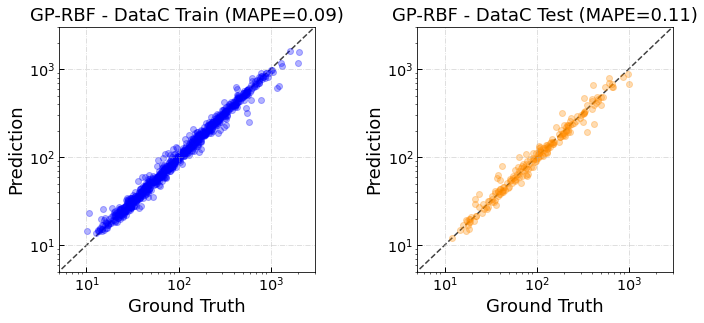

In [20]:
plt_true_vs_pred([yc_train, yc_test], 
                 [yc_pred_train, yc_pred_test], 
                 ['GP-RBF - DataC Train','GP-RBF - DataC Test'],
                 ['blue', 'darkorange'])

#### Gaussian Process Regression with `GPy`

In [21]:
import GPy 
from GPy.models import GPRegression
## 
ker_C = GPy.kern.Matern52(input_dim = 5, ARD =True)#
ker_C.lengthscale.constrain_bounded(1e-2, 10)
ker_C.variance.constrain_bounded(1e-2, 100.0)

gpy_regr_C = GPRegression(Xc_train,yc_train, ker_C)#
gpy_regr_C.Gaussian_noise.variance = (0.08)**2
gpy_regr_C.Gaussian_noise.variance.fix()
gpy_regr_C.randomize()
gpy_regr_C.optimize_restarts(num_restarts=10,verbose =False, messages=False)
print(ker_C.lengthscale)
print(ker_C.variance)
print(gpy_regr_C.Gaussian_noise)


yc_pred_train, yc_uncer_train= gpy_regr_C.predict(Xc_train)
yc_pred_test, yc_uncer_test = gpy_regr_C.predict(Xc_test)


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


  index  |  GP_regression.Mat52.lengthscale  |  constraints  |  priors
  [0]    |                       9.99999995  |   0.01,10.0   |        
  [1]    |                       6.50513626  |   0.01,10.0   |        
  [2]    |                       2.14247229  |   0.01,10.0   |        
  [3]    |                       7.37914997  |   0.01,10.0   |        
  [4]    |                       2.38046268  |   0.01,10.0   |        
  index  |  GP_regression.Mat52.variance  |  constraints  |  priors
  [0]    |                    5.85548453  |  0.01,100.0   |        
  Gaussian_noise.  |   value  |  constraints  |  priors
  variance         |  0.0064  |   +ve fixed   |        


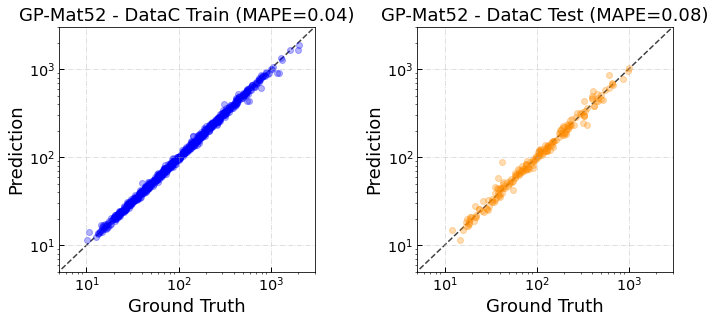

In [22]:
plt_true_vs_pred([yc_train, yc_test], 
                 [yc_pred_train, yc_pred_test], 
                 ['GP-Mat52 - DataC Train','GP-Mat52 - DataC Test'],
                 ['blue', 'darkorange'])

### Hyperparameter Tuning for the regression models
- Grid Search CV
- Randomized Search CV


#### Parameter Tuning for Gradient Boosting Regression


In [36]:
from scipy import stats 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

## define parameter choices
param_distributions = {
    'n_estimators': stats.randint(low=10, high=1000),
    'max_depth': stats.randint(low=2, high=10),
    'min_samples_split': stats.randint(low=2, high=10),
    'learning_rate': [0.1, 0.75, 0.05,0.04, 0.03,0.02,0.01, 0.05]
}


gb_reg_ht = GradientBoostingRegressor()
regressor_cv = RandomizedSearchCV(gb_reg_ht, 
                                  param_distributions=param_distributions,
                                  n_iter=20, verbose=True,
                                  n_jobs = -1)

regressor_cv.fit(Xc_train, yc_train.ravel())
yc_pred_train = regressor_cv.predict(Xc_train)
yc_pred_test = regressor_cv.predict(Xc_test)
print('Best params: \n', regressor_cv.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best params: 
 {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_split': 6, 'n_estimators': 779}


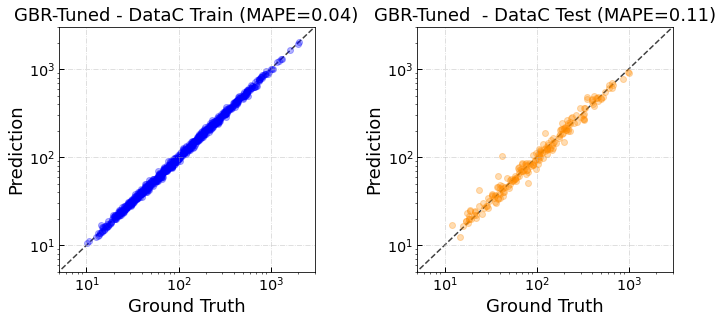

In [37]:
plt_true_vs_pred([yc_train, yc_test], 
                 [yc_pred_train, yc_pred_test], 
                 ['GBR-Tuned - DataC Train','GBR-Tuned  - DataC Test'],
                 ['blue', 'darkorange'])

#### Parameter Tuning for Neural Network Regression

In [44]:
from scipy import stats 
from sklearn.model_selection import RandomizedSearchCV
nn_reg_ht = MLPRegressor()

param_distributions = {'hidden_layer_sizes': [(128,256,128), (256,256,256), (128,128,128)],
                       'activation': ['relu','tanh','logistic'],
                       'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05],
                       'learning_rate': ['constant','adaptive'],
                       'solver': ['adam'],
                       'max_iter':[1000, 2000]}

regressor_cv = RandomizedSearchCV(nn_reg_ht, 
                                  param_distributions=param_distributions,
                                  n_iter=10, verbose=True, n_jobs = -1)
regressor_cv.fit(Xc_train, yc_train)
yc_pred_train = regressor_cv.predict(Xc_train)
yc_pred_test = regressor_cv.predict(Xc_test)
print('Best params: \n', regressor_cv.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


 /opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Best params: 
 {'solver': 'adam', 'max_iter': 1000, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (256, 256, 256), 'alpha': 0.005, 'activation': 'relu'}


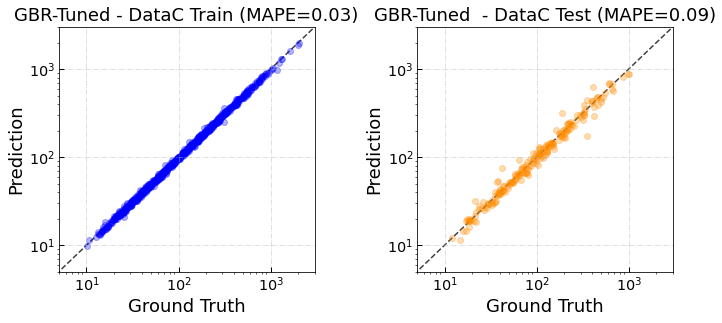

In [41]:
plt_true_vs_pred([yc_train, yc_test], 
                 [yc_pred_train, yc_pred_test], 
                 ['GBR-Tuned - DataC Train','GBR-Tuned  - DataC Test'],
                 ['blue', 'darkorange'])

### Ensemble Learning 
When we have a hard time to choose a single model for our data, we can also combine the learnings from every model. Ensemble learning uses each model as a base learner and use a secondary regression to integrate these models' results. 


Integrating the results from Manny Regressors 

In [160]:
# Model integration 
def regr_pred(regr_list, X):
    y_regr_pred = []
    for regr in regr_list:
        y_regr_pred.append(np.exp(std_scalery[0].inverse_transform(regr(X).ravel())))
    return np.array(y_regr_pred)

# Modify the output of GP model to single value 
def gpy_regrC_predict(X, gpy_regr = gpy_regr_C):
    yc_pred, yc_uncer= gpy_regr.predict(X)
    return yc_pred.ravel()



In [78]:
def ensem_plt_true_vs_pred (y_true_list, y_pred_list, title_str_list, color_list):
    fig, axes = plt.subplots(1, 2, figsize=(5.5*2, 4.5))
    fs = 18
    for i in np.arange(len(axes)):
        ## inverse transform 
        y_true = y_inverse_transform(y_true_list[i], std_scalery[0])
        y_pred = y_pred_list[i]#y_inverse_transform(y_pred_list[i], std_scalery[0])
        lims1 = (0*0.9, 5000*1.1)
        axes[i].scatter(y_true, y_pred, alpha = 0.3, c = color_list[i])
        axes[i].plot(lims1, lims1, 'k--', alpha=0.75, zorder=0)
        rmse_value = np.sqrt(mse(y_true, y_pred))
        mae_value = mae(y_true, y_pred)
        mape_value = mape(y_true, y_pred)

        title = title_str_list[i] + " (MAPE=%.2f" % mape_value+')'
        axes[i].set_xlabel('Ground Truth', fontsize = fs)
        axes[i].set_ylabel('Prediction', fontsize = fs)
        axes[i].set_title(title, fontsize = fs)
        axes[i].set_xlim(5,3000)
        axes[i].set_ylim(5,3000)
        axes[i].set_yscale('log')
        axes[i].set_xscale('log')

        axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
        axes[i].grid(True, linestyle='-.')

        
    plt.subplots_adjust(wspace = 0.4)
    plt.show()

#### Integrating the results by linear model

In [158]:
regrC_list = [NN_regr_C.predict, gb_regr_C.predict, gp_regr_C.predict, rf_regr_C.predict, gpy_regrC_predict]
lin_reg_ensem = LinearRegression()

X_train_ensem = np.transpose(regr_pred(regrC_list, Xc_train))
y_train_ensem = y_inverse_transform(yc_train, std_scalery[0])
y_train_ensem = y_inverse_transform(yc_train, std_scalery[0])

lin_reg_ensem.fit(X_train_ensem, y_train_ensem)
yc_pred_train = lin_reg_ensem.predict(np.transpose(regr_pred(regrC_list, Xc_train)))
yc_pred_test = lin_reg_ensem.predict(np.transpose(regr_pred(regrC_list, Xc_test)))

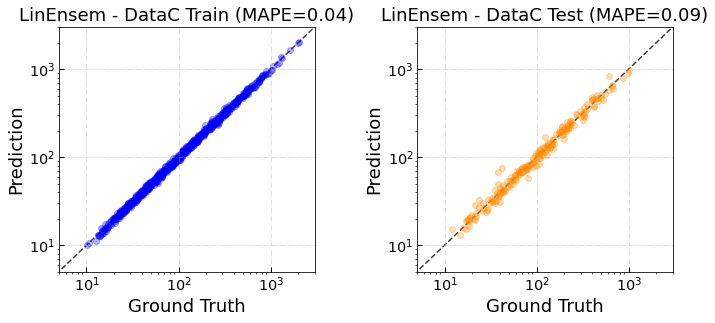

In [159]:
ensem_plt_true_vs_pred([yc_train, yc_test], 
                 [yc_pred_train, yc_pred_test], 
                 ['LinEnsem - DataC Train','LinEnsem - DataC Test'],
                 ['blue', 'darkorange'])

#### Integrating the results by linear model

In [156]:
regrC_list = [NN_regr_C.predict, gb_regr_C.predict, gp_regr_C.predict, rf_regr_C.predict, gpy_regrC_predict]
rf_reg_ensem = RandomForestRegressor(n_estimators=100,max_depth=8,min_samples_split=10)

X_train_ensem = np.transpose(regr_pred(regrC_list, Xc_train))
y_train_ensem = y_inverse_transform(yc_train, std_scalery[0])
y_train_ensem = y_inverse_transform(yc_train, std_scalery[0])

rf_reg_ensem.fit(X_train_ensem, y_train_ensem.ravel())
yc_pred_train = rf_reg_ensem.predict(np.transpose(regr_pred(regrC_list, Xc_train)))
yc_pred_test = rf_reg_ensem.predict(np.transpose(regr_pred(regrC_list, Xc_test)))

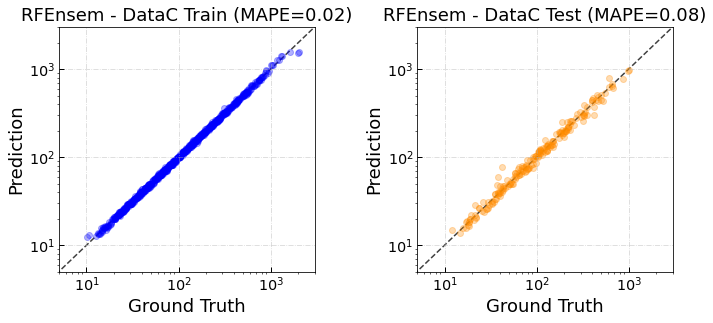

In [157]:
ensem_plt_true_vs_pred([yc_train, yc_test], 
                 [yc_pred_train, yc_pred_test], 
                 ['RFEnsem - DataC Train','RFEnsem - DataC Test'],
                 ['blue', 'darkorange'])